In [1]:
import tensorflow as tf
import numpy as np

In [6]:
a = tf.constant(10) # tf.constant() : 상수를 만듬
b = tf.constant(20)

c = a + b
d = (a + b).numpy() # numpy 메서드는 numpy 값을 리턴

print(type(c))
print(c)
print(type(d), d)
d_numpy_to_tensor = tf.convert_to_tensor(d)

print(type(d_numpy_to_tensor))
print(d_numpy_to_tensor)

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(30, shape=(), dtype=int32)
<class 'numpy.int32'> 30
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(30, shape=(), dtype=int32)


In [7]:
# 예제

a = tf.constant(1.0)
b = tf.constant(2.0)

c = a + b
print(c.numpy()) # Eager Excution

3.0


In [9]:
# 변수 타입

W = tf.Variable(tf.random.normal([1])) # 가우시안 분포

print("initial W = ", W.numpy())
print("=============================")

# session 생성없이 즉시 실행(Eager Excution)
# numpy()메서드 사용하면 numpy값을 리턴해 줌

for step in range(2):
    W = W + 1.0 # 변수 W 초기화 없이 즉시 실행
    print("step =", step, ", W = ", W.numpy()) 
# numpy()함수 사용하여 tensor를 numpy값으로 출력

initial W =  [-0.6191106]
step = 0 , W =  [0.38088942]
step = 1 , W =  [1.3808894]


In [10]:
# tf.placeholder() 삭제
a = tf.constant(1.0)
b = tf.constant(3.0)

# 함수 정의 
def tensor_sum(x, y):
    return x + y

result = tensor_sum(a, b)

print(type(result))
print(result.numpy())  # Eager Excution

<class 'tensorflow.python.framework.ops.EagerTensor'>
4.0


## Keras as High Level API

---
#### Keras in TensorFlow 2.0
- Keras창시자 프랑소와 숄레가 TF2.0 개발에 참여하였고 TF 2.0에서는 공식적이고 유일하 ㄴHIgh-Level API로서 Keras를 채택함


- 또한 프랑소와 숄레는 앞으로 native Keras보다는 tf.keras처럼 TF에서 케라스를 사용할 것을 권장
---    
#### Keras 특징
- User Friendliness : Keras의 직괒넉이 API를 이용하면 일반 신경망(ANN), CNN, RNN 모델 또는 이를 조합한 다양한 딥러닝 모델을(몇줄의 코드만으로 ) 쉬게 구축 할 수 있음


- MOdularity : Keras에서 제공하는 모듈은 독립적으로 설정 가능함, 즉 식경망 층, 손실함수, 활성화 함수, 최적화 알고리즘 등은 모두도립적인 모듈이기 때문에 이러한 모듈을 서로 조함하기만 하면 새로운 딥러닝 모델을 쉽고 빠르게 만들어서 학습시킬수 있음

In [11]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

import numpy as np
print(tf.__version__)

2.3.1


#### 예제1

In [12]:
x_data = np.array([1,2,3,4,5,6]) # 입력 데이터
t_data = np.array([3,4,5,6,7,8]) # 정답 데이터

In [15]:
model = Sequential() # 모델
model.add(Flatten(input_shape=(1,)))       # 입력층
model.add(Dense(1, activation="linear")) #  출력층

# model.add(Dense(1, input_shape(1,), activation='linear')) 
# 입력층 없이 바로 모델을 구축함

In [16]:
model.compile(optimizer=SGD(learning_rate=1e-2), loss="mse")
model.summary() 
# optimizer=SGD :: 최적화 알고리즘은 SGD 사용
# 손실함수는 mse(평균 제곱 오차)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 학습
hist = model.fit(x_data, t_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.3115
Epoch 2/1000
1/1 [==============================] - 0s 999us/step - loss: 0.3093
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3070
Epoch 4/1000
1/1 [==============================] - 0s 997us/step - loss: 0.3048
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3026
Epoch 6/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.3004
Epoch 7/1000
1/1 [==============================] - 0s 997us/step - loss: 0.2982
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2960
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2938
Epoch 10/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2917
Epoch 11/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.2896
Epoch 12/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.2875
Epoch 13/1000
1/1 [==================

1/1 [==============================] - 0s 1000us/step - loss: 0.1489
Epoch 103/1000
1/1 [==============================] - 0s 999us/step - loss: 0.1478
Epoch 104/1000
1/1 [==============================] - 0s 999us/step - loss: 0.1467
Epoch 105/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1456
Epoch 106/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1446
Epoch 107/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1435
Epoch 108/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1425
Epoch 109/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.1414
Epoch 110/1000
1/1 [==============================] - 0s 990us/step - loss: 0.1404
Epoch 111/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.1394
Epoch 112/1000
1/1 [==============================] - 0s 999us/step - loss: 0.1384
Epoch 113/1000
1/1 [==============================] - 0s 0s/step - loss: 0.1374
Epoch 114/1000
1/1 [===========

1/1 [==============================] - 0s 999us/step - loss: 0.0716
Epoch 203/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0711
Epoch 204/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0706
Epoch 205/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0701
Epoch 206/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0696
Epoch 207/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0691
Epoch 208/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0686
Epoch 209/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0681
Epoch 210/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0676
Epoch 211/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0671
Epoch 212/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0666
Epoch 213/1000
1/1 [==============================] - 0s 990us/step - loss: 0.0661
Epoch 214/1000
1/1 [==============

1/1 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 403/1000
1/1 [==============================] - 0s 989us/step - loss: 0.0165
Epoch 404/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0164
Epoch 405/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 406/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0161
Epoch 407/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0160
Epoch 408/1000
1/1 [==============================] - 0s 990us/step - loss: 0.0159
Epoch 409/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0158
Epoch 410/1000
1/1 [==============================] - 0s 991us/step - loss: 0.0157
Epoch 411/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 412/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0154
Epoch 413/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0153
Epoch 414/1000
1/1 [========

1/1 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 503/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0079
Epoch 504/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0079
Epoch 505/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 506/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 507/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0077
Epoch 508/1000
1/1 [==============================] - 0s 991us/step - loss: 0.0076
Epoch 509/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 510/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0075
Epoch 511/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 512/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0074
Epoch 513/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0074
Epoch 514/1000
1/1 [=================

1/1 [==============================] - 0s 1000us/step - loss: 0.0038
Epoch 603/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0038
Epoch 604/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 605/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0038
Epoch 606/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0037
Epoch 607/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0037
Epoch 608/1000
1/1 [==============================] - 0s 997us/step - loss: 0.0037
Epoch 609/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 610/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0036
Epoch 611/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 612/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0036
Epoch 613/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0035
Epoch 614/1000
1/1 [======

1/1 [==============================] - 0s 0s/step - loss: 0.0019
Epoch 703/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0018
Epoch 704/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 705/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 706/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0018
Epoch 707/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 708/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0018
Epoch 709/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 710/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 711/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0017
Epoch 712/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0017
Epoch 713/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 714/1000
1/1 [=============

1/1 [==============================] - 0s 1ms/step - loss: 4.4801e-04
Epoch 897/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.4475e-04
Epoch 898/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.4151e-04
Epoch 899/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.3830e-04
Epoch 900/1000
1/1 [==============================] - 0s 1000us/step - loss: 4.3511e-04
Epoch 901/1000
1/1 [==============================] - 0s 990us/step - loss: 4.3193e-04
Epoch 902/1000
1/1 [==============================] - 0s 999us/step - loss: 4.2879e-04
Epoch 903/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.2567e-04
Epoch 904/1000
1/1 [==============================] - 0s 998us/step - loss: 4.2257e-04
Epoch 905/1000
1/1 [==============================] - 0s 0s/step - loss: 4.1949e-04
Epoch 906/1000
1/1 [==============================] - 0s 998us/step - loss: 4.1643e-04
Epoch 907/1000
1/1 [==============================] - 0s 997us/step - 

In [22]:
# 예측
result = model.predict (np.array([-3.1, 3.0, 3.5, 15.0, 20.1]))
print(result)

[[-1.1566691]
 [ 4.990163 ]
 [ 5.494002 ]
 [17.082293 ]
 [22.221447 ]]


### Linear Regression, Loss Function
---
- Gradiend Decent algorithm

In [23]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
print(tf.__version__)

2.3.1


In [25]:
# 학습 데이터
x_data = np.array([[1,2,0], [5,4,3], [1,2,-1], [3,1,0], [2,4,2],
                  [4,1,2], [-1,3,2], [4,3,3], [0,2,6], [2,2,1],
                  [1,-2,-2],[0,1,3], [1,1,3], [0, 1, 4], [2,3,3]])

t_data = np.array([-4, 4, -6, 3, -4, 9, -7, 5, 6, 0, 4, 3, 5, 5, 1])

print("x_data.shape = ", x_data.shape, ", t_data.shape = ", t_data.shape)

x_data.shape =  (15, 3) , t_data.shape =  (15,)


In [27]:
# 모델 구축
model = Sequential()

model.add(Dense(1, input_shape=(3, ), activation='linear'))
# 학습데이터가 15*3행이므로 input_shape을 3으로
# 활성화 함수(activation은 linear로)

In [28]:
# 모델 컴파일
model.compile(optimizer=SGD(learning_rate=1e-2), loss="mse")
model.summary()
# 선형회귀이기에 loss는 mse로 함
# Param이 4개인 이유는 학습할 weight가 세개 나머지 b(bias가지 총 네개임)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 모델 학습
hist = model.fit(x_data, t_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.8057
Epoch 2/1000
1/1 [==============================] - 0s 0s/step - loss: 9.2926
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 8.8286
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 8.3988
Epoch 5/1000
1/1 [==============================] - 0s 0s/step - loss: 7.9954
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 7.6142
Epoch 7/1000
1/1 [==============================] - 0s 998us/step - loss: 7.2524
Epoch 8/1000
1/1 [==============================] - 0s 999us/step - loss: 6.9085
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.5812
Epoch 10/1000
1/1 [==============================] - 0s 0s/step - loss: 6.2696
Epoch 11/1000
1/1 [==============================] - 0s 990us/step - loss: 5.9728
Epoch 12/1000
1/1 [==============================] - 0s 0s/step - loss: 5.6901
Epoch 13/1000
1/1 [============================

1/1 [==============================] - 0s 1ms/step - loss: 7.4577e-04
Epoch 202/1000
1/1 [==============================] - 0s 1ms/step - loss: 7.1594e-04
Epoch 203/1000
1/1 [==============================] - 0s 998us/step - loss: 6.8746e-04
Epoch 204/1000
1/1 [==============================] - 0s 1ms/step - loss: 6.6028e-04
Epoch 205/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.3431e-04
Epoch 206/1000
1/1 [==============================] - 0s 2ms/step - loss: 6.0952e-04
Epoch 207/1000
1/1 [==============================] - 0s 2ms/step - loss: 5.8586e-04
Epoch 208/1000
1/1 [==============================] - 0s 1ms/step - loss: 5.6324e-04
Epoch 209/1000
1/1 [==============================] - 0s 1000us/step - loss: 5.4164e-04
Epoch 210/1000
1/1 [==============================] - 0s 1ms/step - loss: 5.2102e-04
Epoch 211/1000
1/1 [==============================] - 0s 1ms/step - loss: 5.0130e-04
Epoch 212/1000
1/1 [==============================] - 0s 1ms/step - loss: 4

1/1 [==============================] - 0s 0s/step - loss: 1.9082e-05
Epoch 392/1000
1/1 [==============================] - 0s 990us/step - loss: 1.8874e-05
Epoch 393/1000
1/1 [==============================] - 0s 979us/step - loss: 1.8668e-05
Epoch 394/1000
1/1 [==============================] - 0s 990us/step - loss: 1.8465e-05
Epoch 395/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.8264e-05
Epoch 396/1000
1/1 [==============================] - 0s 999us/step - loss: 1.8065e-05
Epoch 397/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.7869e-05
Epoch 398/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.7674e-05
Epoch 399/1000
1/1 [==============================] - 0s 0s/step - loss: 1.7481e-05
Epoch 400/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.7291e-05
Epoch 401/1000
1/1 [==============================] - 0s 997us/step - loss: 1.7104e-05
Epoch 402/1000
1/1 [==============================] - 0s 0s/step - loss:

1/1 [==============================] - 0s 990us/step - loss: 2.4217e-06
Epoch 582/1000
1/1 [==============================] - 0s 999us/step - loss: 2.3956e-06
Epoch 583/1000
1/1 [==============================] - 0s 990us/step - loss: 2.3694e-06
Epoch 584/1000
1/1 [==============================] - 0s 0s/step - loss: 2.3440e-06
Epoch 585/1000
1/1 [==============================] - 0s 991us/step - loss: 2.3187e-06
Epoch 586/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.2936e-06
Epoch 587/1000
1/1 [==============================] - 0s 0s/step - loss: 2.2690e-06
Epoch 588/1000
1/1 [==============================] - 0s 990us/step - loss: 2.2446e-06
Epoch 589/1000
1/1 [==============================] - 0s 999us/step - loss: 2.2202e-06
Epoch 590/1000
1/1 [==============================] - 0s 998us/step - loss: 2.1964e-06
Epoch 591/1000
1/1 [==============================] - 0s 0s/step - loss: 2.1725e-06
Epoch 592/1000
1/1 [==============================] - 0s 0s/step - lo

Epoch 772/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.0540e-07
Epoch 773/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.0208e-07
Epoch 774/1000
1/1 [==============================] - 0s 1000us/step - loss: 2.9896e-07
Epoch 775/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.9575e-07
Epoch 776/1000
1/1 [==============================] - 0s 1000us/step - loss: 2.9263e-07
Epoch 777/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.8939e-07
Epoch 778/1000
1/1 [==============================] - 0s 0s/step - loss: 2.8617e-07
Epoch 779/1000
1/1 [==============================] - 0s 999us/step - loss: 2.8308e-07
Epoch 780/1000
1/1 [==============================] - 0s 994us/step - loss: 2.8008e-07
Epoch 781/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.7712e-07
Epoch 782/1000
1/1 [==============================] - 0s 0s/step - loss: 2.7401e-07
Epoch 783/1000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 0s/step - loss: 3.9132e-08
Epoch 963/1000
1/1 [==============================] - 0s 990us/step - loss: 3.8791e-08
Epoch 964/1000
1/1 [==============================] - 0s 0s/step - loss: 3.8316e-08
Epoch 965/1000
1/1 [==============================] - 0s 989us/step - loss: 3.7893e-08
Epoch 966/1000
1/1 [==============================] - 0s 999us/step - loss: 3.7533e-08
Epoch 967/1000
1/1 [==============================] - 0s 999us/step - loss: 3.7171e-08
Epoch 968/1000
1/1 [==============================] - 0s 0s/step - loss: 3.6715e-08
Epoch 969/1000
1/1 [==============================] - 0s 999us/step - loss: 3.6317e-08
Epoch 970/1000
1/1 [==============================] - 0s 990us/step - loss: 3.5967e-08
Epoch 971/1000
1/1 [==============================] - 0s 1000us/step - loss: 3.5582e-08
Epoch 972/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.5177e-08
Epoch 973/1000
1/1 [==============================] - 0s 1ms/step - 

In [31]:
# 모델 평가 및 예측

test_data = [[5,5,0], [2,3,1], [-1,0,-1], [10, 5, 2],[4, -1,-2]]

ret_val = [2*data[0]-3*data[1] + 2*data[2] for data in test_data] # 실제 정답

pred_val = model.predict(np.array(test_data)) # 예측값

print(pred_val)
print(ret_val)

[[-4.9998407]
 [-3.0000405]
 [-4.0003757]
 [ 9.000445 ]
 [ 6.9997745]]
[-5, -3, -4, 9, 7]


In [32]:
# 모델 가중치(weight), 바이어스(bias)
print(model.input)
print(model.output)
print(model.weights)
#  가중치 :array([[ 2.0000453],[-2.9999535],[ 2.0000298]]
# 바이어스 :array([-0.00030024]

Tensor("dense_1_input:0", shape=(None, 3), dtype=float32)
Tensor("dense_1/BiasAdd:0", shape=(None, 1), dtype=float32)
[<tf.Variable 'dense_1/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 2.0000453],
       [-2.9999535],
       [ 2.0000298]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-0.00030024], dtype=float32)>]


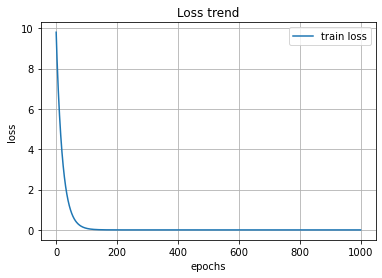

In [34]:
# 모델 손실함수 추세 시각화

import matplotlib.pyplot as plt

plt.title("Loss trend")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.legend(loc='best')
plt.show()

### Logistic Regression

In [46]:
try :
    loaded_data = np.loadtxt('../machine learning Practice/diabetes.csv', delimiter=",",skiprows=1)
    
    x_data = loaded_data[:, 0:-1]
    t_data = loaded_data[:, [-1]]
    
    print("x_data.shape :", x_data.shape)
    print("t_data.shape :", t_data.shape)
    
except Exception as err:
    print(str(err))

x_data.shape : (768, 8)
t_data.shape : (768, 1)


In [47]:
# 모델 구축
model = Sequential()
model.add(Dense(t_data.shape[1], input_shape=(x_data.shape[1],),
                activation='sigmoid'))

In [49]:
# 모델 컴파일
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', 
             metrics=['accuracy'])
model.summary()
# 측정지표를 accuracy로 함

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [52]:
hist = model.fit(x_data, t_data, epochs=500, validation_split=0.2)
# training data로 부터 20%비율로 validation data 생성 후 overfitting 확인
# 

Epoch 1/500
20/20 [==============================] - 0s 3ms/step - loss: 25.1296 - accuracy: 0.5733 - val_loss: 24.7657 - val_accuracy: 0.6364
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 25.9068 - accuracy: 0.5814 - val_loss: 26.9527 - val_accuracy: 0.6364
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 26.3389 - accuracy: 0.5765 - val_loss: 6.7389 - val_accuracy: 0.5584
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 19.5734 - accuracy: 0.5961 - val_loss: 14.6585 - val_accuracy: 0.6364
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 22.6177 - accuracy: 0.5700 - val_loss: 108.3165 - val_accuracy: 0.6429
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 33.1889 - accuracy: 0.5928 - val_loss: 105.0207 - val_accuracy: 0.3571
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 33.2461 - accuracy: 0.5554 - val_loss: 74.9475 - val_accuracy: 0.649

Epoch 113/500
20/20 [==============================] - 0s 2ms/step - loss: 22.0290 - accuracy: 0.6010 - val_loss: 99.9654 - val_accuracy: 0.3571
Epoch 114/500
20/20 [==============================] - 0s 2ms/step - loss: 21.8342 - accuracy: 0.6059 - val_loss: 7.6209 - val_accuracy: 0.6558
Epoch 115/500
20/20 [==============================] - 0s 2ms/step - loss: 19.0772 - accuracy: 0.6107 - val_loss: 33.5080 - val_accuracy: 0.6429
Epoch 116/500
20/20 [==============================] - 0s 2ms/step - loss: 20.8882 - accuracy: 0.5977 - val_loss: 21.6678 - val_accuracy: 0.6883
Epoch 117/500
20/20 [==============================] - 0s 2ms/step - loss: 33.1930 - accuracy: 0.5114 - val_loss: 64.3373 - val_accuracy: 0.3571
Epoch 118/500
20/20 [==============================] - 0s 2ms/step - loss: 23.9282 - accuracy: 0.5831 - val_loss: 7.1006 - val_accuracy: 0.6948
Epoch 119/500
20/20 [==============================] - 0s 2ms/step - loss: 21.4641 - accuracy: 0.5928 - val_loss: 25.8527 - val_accu

20/20 [==============================] - 0s 1ms/step - loss: 24.7175 - accuracy: 0.5863 - val_loss: 33.4544 - val_accuracy: 0.6494
Epoch 226/500
20/20 [==============================] - 0s 1ms/step - loss: 25.6805 - accuracy: 0.5863 - val_loss: 49.1700 - val_accuracy: 0.6429
Epoch 227/500
20/20 [==============================] - 0s 2ms/step - loss: 21.3801 - accuracy: 0.6010 - val_loss: 8.6871 - val_accuracy: 0.6948
Epoch 228/500
20/20 [==============================] - 0s 2ms/step - loss: 26.3567 - accuracy: 0.5733 - val_loss: 7.1533 - val_accuracy: 0.6429
Epoch 229/500
20/20 [==============================] - 0s 1ms/step - loss: 27.8709 - accuracy: 0.5733 - val_loss: 32.7090 - val_accuracy: 0.3571
Epoch 230/500
20/20 [==============================] - 0s 2ms/step - loss: 22.0486 - accuracy: 0.5879 - val_loss: 36.1096 - val_accuracy: 0.6429
Epoch 231/500
20/20 [==============================] - 0s 1ms/step - loss: 28.2981 - accuracy: 0.5749 - val_loss: 21.4800 - val_accuracy: 0.5130
E

20/20 [==============================] - 0s 2ms/step - loss: 27.8365 - accuracy: 0.5489 - val_loss: 6.6002 - val_accuracy: 0.5909
Epoch 338/500
20/20 [==============================] - 0s 1ms/step - loss: 26.3959 - accuracy: 0.5684 - val_loss: 12.1156 - val_accuracy: 0.5974
Epoch 339/500
20/20 [==============================] - 0s 1ms/step - loss: 24.3737 - accuracy: 0.5879 - val_loss: 7.9952 - val_accuracy: 0.6039
Epoch 340/500
20/20 [==============================] - 0s 2ms/step - loss: 22.2353 - accuracy: 0.5977 - val_loss: 25.6614 - val_accuracy: 0.6429
Epoch 341/500
20/20 [==============================] - 0s 2ms/step - loss: 21.5783 - accuracy: 0.6010 - val_loss: 31.7296 - val_accuracy: 0.3831
Epoch 342/500
20/20 [==============================] - 0s 2ms/step - loss: 31.5020 - accuracy: 0.5391 - val_loss: 20.5038 - val_accuracy: 0.6364
Epoch 343/500
20/20 [==============================] - 0s 1ms/step - loss: 23.4187 - accuracy: 0.5798 - val_loss: 6.3530 - val_accuracy: 0.6429
Ep

20/20 [==============================] - 0s 1ms/step - loss: 27.1628 - accuracy: 0.5505 - val_loss: 61.6579 - val_accuracy: 0.6494
Epoch 450/500
20/20 [==============================] - 0s 2ms/step - loss: 22.6740 - accuracy: 0.5961 - val_loss: 46.5813 - val_accuracy: 0.6429
Epoch 451/500
20/20 [==============================] - 0s 2ms/step - loss: 21.5037 - accuracy: 0.5945 - val_loss: 24.0317 - val_accuracy: 0.5325
Epoch 452/500
20/20 [==============================] - 0s 2ms/step - loss: 23.1128 - accuracy: 0.5961 - val_loss: 13.3582 - val_accuracy: 0.6753
Epoch 453/500
20/20 [==============================] - 0s 2ms/step - loss: 26.9773 - accuracy: 0.5603 - val_loss: 6.4395 - val_accuracy: 0.7078
Epoch 454/500
20/20 [==============================] - 0s 2ms/step - loss: 31.2598 - accuracy: 0.5423 - val_loss: 25.1774 - val_accuracy: 0.6429
Epoch 455/500
20/20 [==============================] - 0s 2ms/step - loss: 19.7724 - accuracy: 0.5961 - val_loss: 16.6888 - val_accuracy: 0.4286


In [53]:
# 모델(정확도) 평가
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 833us/step - loss: 13.7875 - accuracy: 0.6602


[13.787464141845703, 0.66015625]

## Deep Learning Basic

In [63]:
x_data = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]).astype('float32')
t_data = np.array([0,0,0,0,0,0,1,1,1,1]).astype('float32')

In [64]:
# 모델 구축
model = Sequential()

model.add(Dense(8, input_shape=(1,),  # 8은 은닉층 노드 개수
         activation='sigmoid'))      # 1은 은닉층 노드 개수
          
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [68]:
# 모델 컴파일
model.compile(tf.keras.optimizers.SGD(learning_rate=0.1), 
              loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [69]:
# 학습
hist = model.fit(x_data, t_data, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 0.7618 - accuracy: 0.4000
Epoch 2/500
1/1 [==============================] - 0s 0s/step - loss: 0.7525 - accuracy: 0.4000
Epoch 3/500
1/1 [==============================] - 0s 0s/step - loss: 0.7445 - accuracy: 0.4000
Epoch 4/500
1/1 [==============================] - 0s 1000us/step - loss: 0.7375 - accuracy: 0.4000
Epoch 5/500
1/1 [==============================] - 0s 1000us/step - loss: 0.7313 - accuracy: 0.4000
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 0.7258 - accuracy: 0.4000
Epoch 7/500
1/1 [==============================] - 0s 1000us/step - loss: 0.7208 - accuracy: 0.4000
Epoch 8/500
1/1 [==============================] - 0s 999us/step - loss: 0.7163 - accuracy: 0.4000
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 0.7121 - accuracy: 0.4000
Epoch 10/500
1/1 [==============================] - 0s 1ms/step - loss: 0.7081 - accuracy: 0.4000
Epoch 11/500
1/1 [==

1/1 [==============================] - 0s 1000us/step - loss: 0.5173 - accuracy: 0.8000
Epoch 167/500
1/1 [==============================] - 0s 1ms/step - loss: 0.5165 - accuracy: 0.8000
Epoch 168/500
1/1 [==============================] - 0s 0s/step - loss: 0.5157 - accuracy: 0.8000
Epoch 169/500
1/1 [==============================] - 0s 0s/step - loss: 0.5149 - accuracy: 0.8000
Epoch 170/500
1/1 [==============================] - 0s 1ms/step - loss: 0.5141 - accuracy: 0.8000
Epoch 171/500
1/1 [==============================] - 0s 998us/step - loss: 0.5133 - accuracy: 0.8000
Epoch 172/500
1/1 [==============================] - 0s 1ms/step - loss: 0.5125 - accuracy: 0.8000
Epoch 173/500
1/1 [==============================] - 0s 1000us/step - loss: 0.5117 - accuracy: 0.8000
Epoch 174/500
1/1 [==============================] - 0s 1000us/step - loss: 0.5109 - accuracy: 0.8000
Epoch 175/500
1/1 [==============================] - 0s 999us/step - loss: 0.5101 - accuracy: 0.8000
Epoch 176/500

1/1 [==============================] - 0s 1ms/step - loss: 0.3952 - accuracy: 1.0000
Epoch 331/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 1.0000
Epoch 332/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 1.0000
Epoch 333/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 1.0000
Epoch 334/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 1.0000
Epoch 335/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 1.0000
Epoch 336/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 1.0000
Epoch 337/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 1.0000
Epoch 338/500
1/1 [==============================] - 0s 999us/step - loss: 0.3900 - accuracy: 1.0000
Epoch 339/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3893 - accuracy: 1.0000
Epoch 340/500
1/1 [===

1/1 [==============================] - 0s 1000us/step - loss: 0.3028 - accuracy: 1.0000
Epoch 495/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3024 - accuracy: 1.0000
Epoch 496/500
1/1 [==============================] - 0s 999us/step - loss: 0.3019 - accuracy: 1.0000
Epoch 497/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3015 - accuracy: 1.0000
Epoch 498/500
1/1 [==============================] - 0s 1000us/step - loss: 0.3010 - accuracy: 1.0000
Epoch 499/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3005 - accuracy: 1.0000
Epoch 500/500
1/1 [==============================] - 0s 1000us/step - loss: 0.3001 - accuracy: 1.0000


In [70]:
# 예측(모델 검증)
test_data = np.array([0.5, 3.0, 3.5, 11.0, 13.0, 31.0])
sigmoid_value = model.predict(test_data)

logical_value = tf.cast(sigmoid_value > 0.5,dtype=tf.float32)

for i in range(len(test_data)):
    print(test_data[i],
         sigmoid_value[i], logical_value.numpy()[i])
    

0.5 [0.03213722] [0.]
3.0 [0.04679847] [0.]
3.5 [0.05345991] [0.]
11.0 [0.38866115] [0.]
13.0 [0.51675254] [1.]
31.0 [0.8448989] [1.]


### Deep Learning MNIST Example
---
- **정규화(Normalization)**
    + 딥러닝에서 이비력 데이터의 상대적 크기에 대한 양향을 줄이기 위해서, 다음과 같은 MinMax공색을 이용해서 모든 데이터 범위를 0 ~ 1사이의 값으로 변화 시키는 과정 new = data - Min / Max - Min


- **표준화(Standardization)**
    - 모델이 더 높은 precision을 가질 수 있도록, 다음과 같이 데이터 평균(Mean)과 표준 편차(Std)를 이용하여 특정 범위를 벗아난 데이터는 outlier로 간주하여 제거하는 과정  new = data - Mean / Std
    
    
- **원핫 인코딩(One-Hot Encoding)**
     - (1) 정답 개수와 동일한 크기를 가지는 리스트를 만든 후에 (2)정답에 해당하는 리스트의 인덱스 값에는 1을 넣고, 나머지 인덱스에는 모두 0을 넣어 정답을 표현하는 방식
     * 즉 리스트에서 가장 큰 값을 가지는 인덱스를 정답으로 인식

In [ ]:
# model.add() :: ANN에서는 Dense()
# CNN : Conv2D(), MaxPool2D(), Flatten()을 사용함

# 정답을 one-hot-encoding방식을 설정했다면 loss function을 나타내는 부분을 
# loss='categorical_crossentropy' 형식으로 나타내며, 
# 그것이 아니라면 loss='sparse_categorical_crossentropy' 형식을 지정함

In [81]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

In [82]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

print("x_train.shape :", x_train.shape, "y_train.shape :", t_train.shape)
print("x_test.shape :", x_test.shape, "t_test.shape :", y_test.shape)

x_train.shape : (60000, 28, 28) y_train.shape : (60000,)
x_test.shape : (10000, 28, 28) t_test.shape : (10000,)


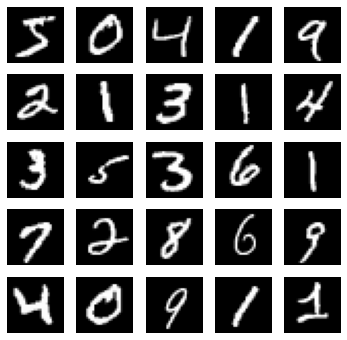

In [83]:
import matplotlib.pyplot as plt

#  25개의 이미지 출력
plt.figure(figsize=(6,6))

for index in range(25):
    plt.subplot(5,5, index + 1) # 5행 5열
    plt.imshow(x_train[index], cmap='gray')
    plt.axis('off')
plt.show()

In [84]:
# 데이터 전처리(정규화, 원핫인코딩)

# 학습데이터 정규화
x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답데이터 원핫인코딩
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)
# 정답개수가 10개이기에 num_classes를 10으로 함

In [85]:
# 모델 구축 및 컴파일

model = Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # 입력층
# 28*28크기의 2차원 이미지를 784개의 1차원 벡터로 변환

model.add(tf.keras.layers.Dense(100, activation='relu')) # 은닉층
model.add(tf.keras.layers.Dense(10, activation='softmax')) # 출력층 
# 정답과 가타은 노드 개수 설정

In [86]:
# 컴파일

model.compile(optimizer=Adam(learning_rate=1e-3), 
              loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [87]:
# 모델 학습
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3143 - accuracy: 0.9124 - val_loss: 0.1870 - val_accuracy: 0.9435
Epoch 2/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1431 - accuracy: 0.9576 - val_loss: 0.1438 - val_accuracy: 0.9564
Epoch 3/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1009 - accuracy: 0.9697 - val_loss: 0.1185 - val_accuracy: 0.9658
Epoch 4/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0766 - accuracy: 0.9778 - val_loss: 0.1179 - val_accuracy: 0.9644
Epoch 5/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0586 - accuracy: 0.9822 - val_loss: 0.1066 - val_accuracy: 0.9684
Epoch 6/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0471 - accuracy: 0.9857 - val_loss: 0.1008 - val_accuracy: 0.9703
Epoch 7/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0382 - accuracy: 0.9885 - val_loss: 0.1086 - val_accuracy:

In [88]:
# 모델(정확도) 평가
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 617us/step - loss: 0.1212 - accuracy: 0.9759


[0.1211935430765152, 0.9758999943733215]

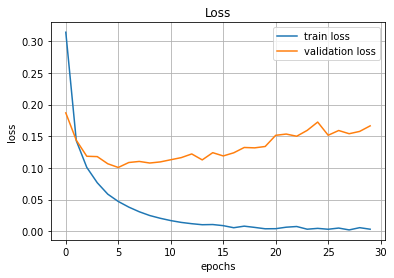

In [89]:
# 손실 및 정확도 시각화

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')
plt.show()

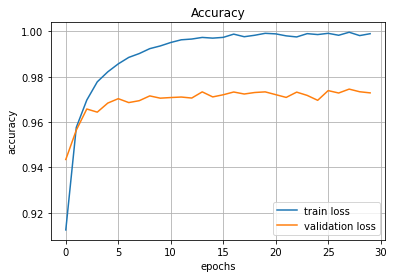

In [90]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train loss')
plt.plot(hist.history['val_accuracy'], label='validation loss')

plt.legend(loc='best')
plt.show()

# train loss와 validation loss의 간격이 벌어지는 지점부터 오버피팅이 발생한 것

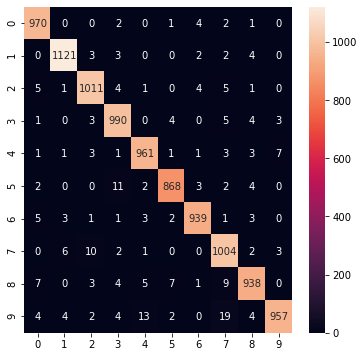

In [91]:
# 혼동 행렬 : 어떤 값을 가장 잘 맞추고 어떤 값을 혼동하는지 보기

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))
pred_val = model.predict(x_test) # 테스트 데이터 예측값

cm = confusion_matrix(np.argmax(t_test, axis=-1),
                     np.argmax(pred_val, axis=-1)) # 정답과 예측값 비교

sns.heatmap(cm, annot=True, fmt='d')

plt.show()

In [92]:
print(cm)
print('\n')

for i in range(10):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f')%
         (i, np.max(cm[i]), np.sum(cm[i]),
         np.max(cm[i])/np.sum(cm[i])))

[[ 970    0    0    2    0    1    4    2    1    0]
 [   0 1121    3    3    0    0    2    2    4    0]
 [   5    1 1011    4    1    0    4    5    1    0]
 [   1    0    3  990    0    4    0    5    4    3]
 [   1    1    3    1  961    1    1    3    3    7]
 [   2    0    0   11    2  868    3    2    4    0]
 [   5    3    1    1    3    2  939    1    3    0]
 [   0    6   10    2    1    0    0 1004    2    3]
 [   7    0    3    4    5    7    1    9  938    0]
 [   4    4    2    4   13    2    0   19    4  957]]


label = 0	(970/980)	accuracy = 0.990
label = 1	(1121/1135)	accuracy = 0.988
label = 2	(1011/1032)	accuracy = 0.980
label = 3	(990/1010)	accuracy = 0.980
label = 4	(961/982)	accuracy = 0.979
label = 5	(868/892)	accuracy = 0.973
label = 6	(939/958)	accuracy = 0.980
label = 7	(1004/1028)	accuracy = 0.977
label = 8	(938/974)	accuracy = 0.963
label = 9	(957/1009)	accuracy = 0.948


### Fashion MNIST Example

In [10]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

In [11]:
(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()
print("x_train.shape :",x_train.shape, ", t_train.shape :", t_train.shape)
print("test.label.shape :",x_test.shape, ", test.label.shape :", t_test.shape)

x_train.shape : (60000, 28, 28) , t_train.shape : (60000,)
test.label.shape : (10000, 28, 28) , test.label.shape : (10000,)


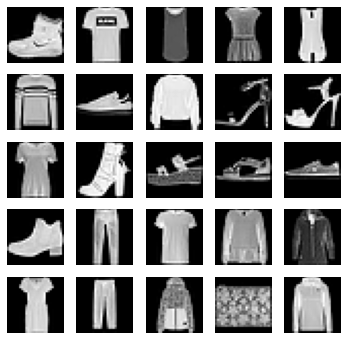

In [12]:
# 데이터 시각화
import matplotlib.pyplot as plt
# 25개의 이미지 출력
plt.figure(figsize=(6,6))

for index in range(25): # 25개의 이미지 출력
    
    plt.subplot(5,5, index + 1)
    plt.imshow(x_train[index], cmap="gray")
    plt.axis('off')
plt.show()

In [13]:
# 데이터 전처리(정규화, 원핫인코딩)

# 학습데이터 정규화
x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답데이터 원핫인코딩
# t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
# t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)
# 정답개수가 10개이기에 num_classes를 10으로 함

# 원 핫인코딩 하지 않고 진행 (10진수 정답 사용)

In [15]:
# 모델 구축 및 컴파일

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # 입력층
# 28*28크기의 2차원 이미지를 784개의 1차원 벡터로 변환

model.add(tf.keras.layers.Dense(100, activation='relu')) # 은닉층
model.add(tf.keras.layers.Dense(10, activation='softmax')) # 출력층 
# 정답과 가타은 노드 개수 설정, 활성화 함수 

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss="sparse_categorical_crossentropy",metrics=["accuracy"])
# 정답이 원핫 인코딩 방식이 아니기 때문에 loss = "sparse_categorical_crossentropy" t사용
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 모델 학습
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5396 - accuracy: 0.8137 - val_loss: 0.4234 - val_accuracy: 0.8511
Epoch 2/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4031 - accuracy: 0.8565 - val_loss: 0.4107 - val_accuracy: 0.8563
Epoch 3/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3623 - accuracy: 0.8695 - val_loss: 0.3642 - val_accuracy: 0.8703
Epoch 4/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3331 - accuracy: 0.8790 - val_loss: 0.3737 - val_accuracy: 0.8674
Epoch 5/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3094 - accuracy: 0.8868 - val_loss: 0.3593 - val_accuracy: 0.8691
Epoch 6/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2961 - accuracy: 0.8906 - val_loss: 0.3465 - val_accuracy: 0.8767
Epoch 7/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.8937 - val_loss: 0.3500 - val_accuracy:

In [18]:
# 모델 평가
model.evaluate(x_test, t_test) 
# 88%의 정확도를 나타냄

313/313 [==============================] - 0s 591us/step - loss: 0.4139 - accuracy: 0.8826


[0.4138510823249817, 0.8826000094413757]

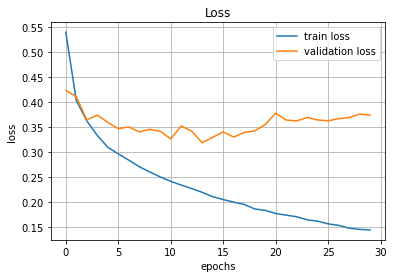

In [19]:
# 손실 및 정확도

# 손실 및 정확도 시각화

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')
plt.show()
# train loss와 validation loss의 간격이 벌어지는 지점부터 오버피팅이 발생한 것

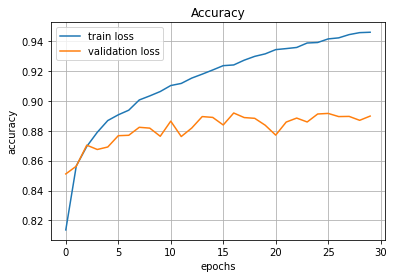

In [20]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train loss')
plt.plot(hist.history['val_accuracy'], label='validation loss')

plt.legend(loc='best')
plt.show()
# train loss와 validation loss의 간격이 벌어지는 지점부터 오버피팅이 발생한 것

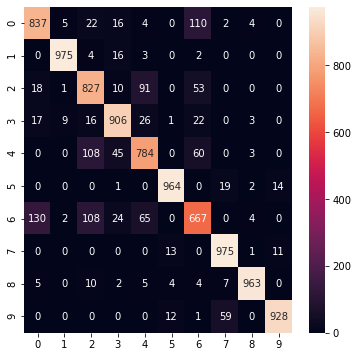

In [22]:
# 혼동 행렬 : 어떤 값을 가장 잘 맞추고 어떤 값을 혼동하는지 보기

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))
pred_val = model.predict(x_test) # 테스트 데이터 예측값

cm = confusion_matrix(t_test,
                     np.argmax(pred_val, axis=-1)) # 정답과 예측값 비교

sns.heatmap(cm, annot=True, fmt='d')

plt.show()
# 정답 6, 2,